<a href="https://colab.research.google.com/github/HemanthSanju/eCommerce_Data_Analysis/blob/main/Hemanth_Pilli_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## customers data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/Customers.csv")

In [35]:
data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
data.tail()


,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
data.nunique()


,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [7]:
data.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [8]:
(data.isnull().sum()/(len(data)))*100

,0
CustomerID,0.0
CustomerName,0.0
Region,0.0
SignupDate,0.0


In [9]:
data.fillna(method='ffill', inplace=True)


<ipython-input-9-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

actual_columns = data.columns.tolist()

for col in actual_columns:
    if col in ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']:
        try:
            data[col] = pd.to_numeric(data[col], errors='ignore')
        except ValueError:
            print(f"Could not convert column '{col}' to numeric. Check its contents.")

numerical_data = data.select_dtypes(include=['number', 'datetime'])

if numerical_data.empty:
    print("No numerical or datetime columns found for plotting histograms.")
else:
    numerical_data.hist(figsize=(15, 10), bins=20)
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

No numerical or datetime columns found for plotting histograms.


<ipython-input-11-2fd5d85f432c>:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


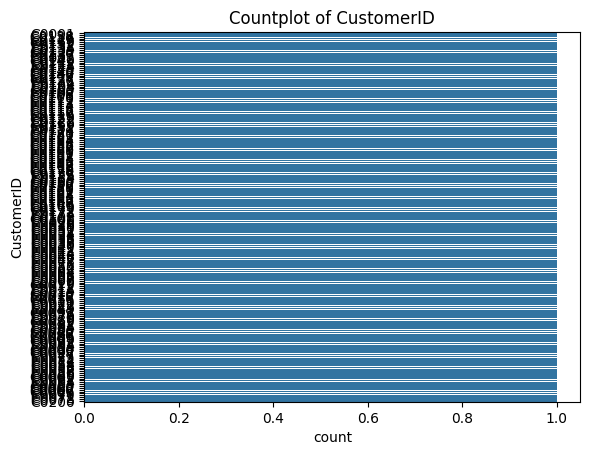

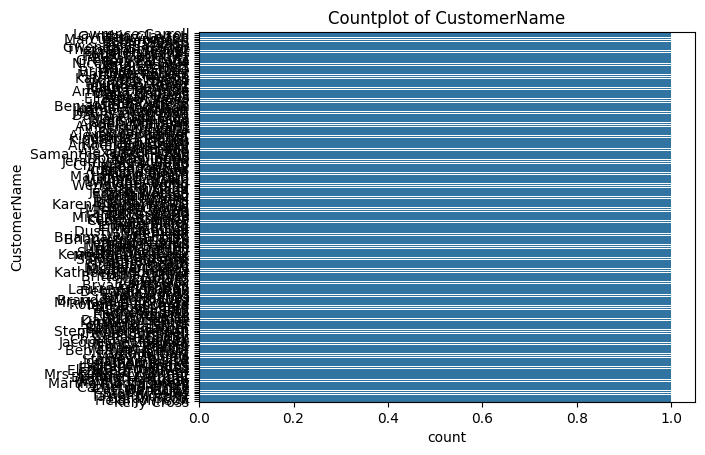

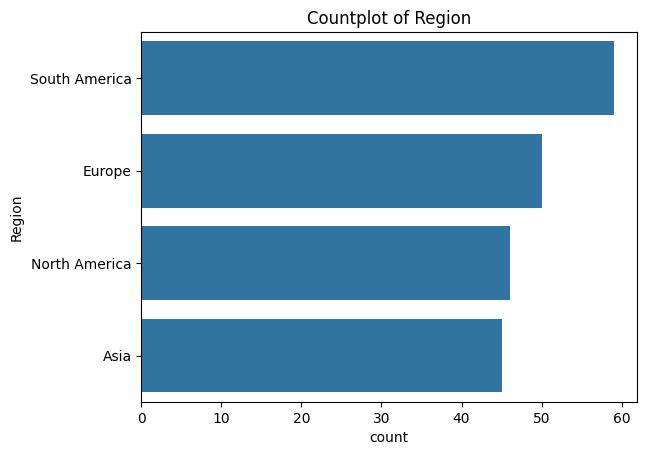

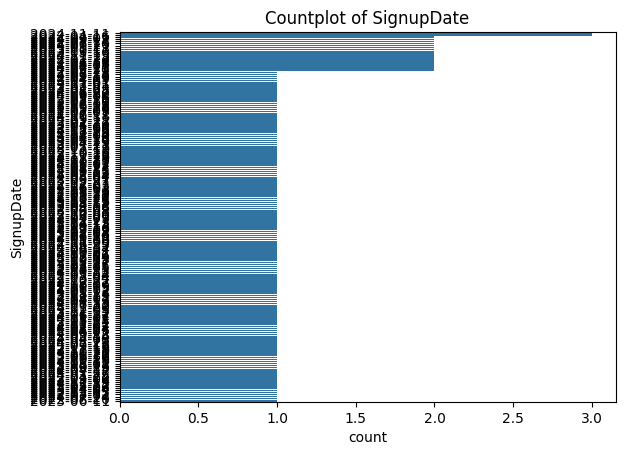

In [12]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()


products data

In [13]:
data = pd.read_csv("/content/Products.csv")

In [14]:
data.tail()


,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [15]:
data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [17]:
data.nunique()


,0
ProductID,100
ProductName,66
Category,4
Price,100


In [18]:
data.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [20]:
(data.isnull().sum()/(len(data)))*100

,0
ProductID,0.0
ProductName,0.0
Category,0.0
Price,0.0


In [21]:
data.fillna(method='ffill', inplace=True)


<ipython-input-21-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


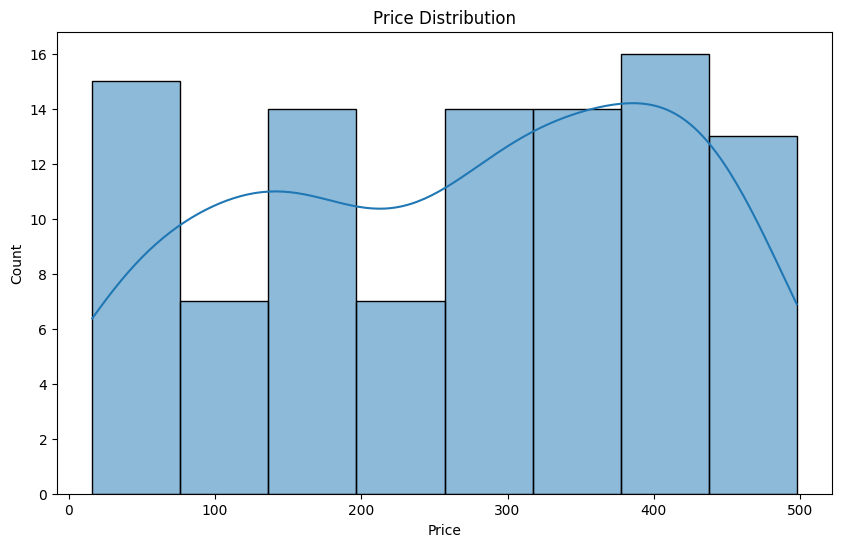

In [22]:
plt.figure(figsize=(10, 6))
# Check if 'price' column exists, if not try 'Price'
if 'price' in data.columns:
    sns.histplot(data['price'], kde=True)
elif 'Price' in data.columns:
    sns.histplot(data['Price'], kde=True) # Use 'Price' if 'price' is not found
else:
    print("Column 'price' or 'Price' not found in the DataFrame.")
plt.title('Price Distribution')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/Products.csv")

if 'category' not in data.columns:
    if 'Category' in data.columns:
        data.rename(columns={'Category': 'category'}, inplace=True)
    else:
        print("Error: 'category' column not found in the DataFrame. Please check your data.")
else:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
    plt.title('Category Count')
    plt.xticks(rotation=45)
    plt.show()

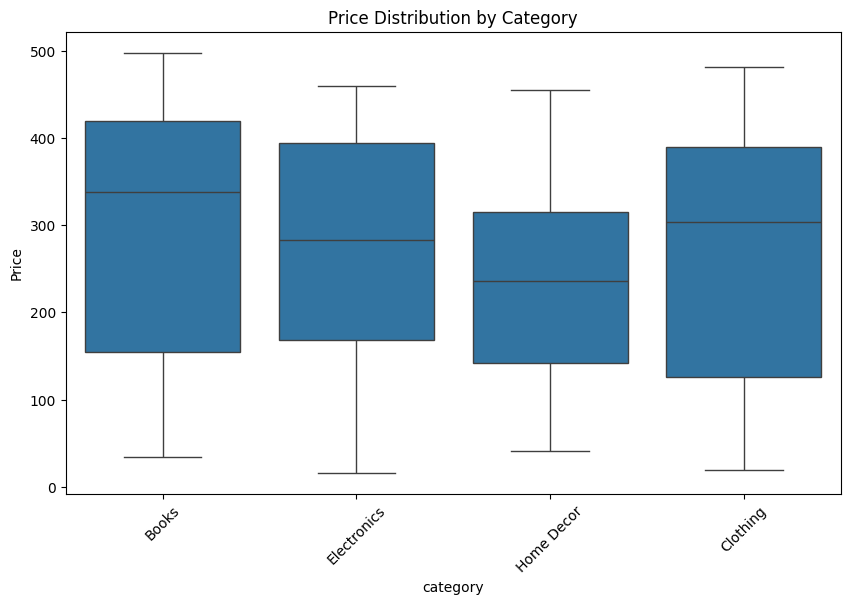

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

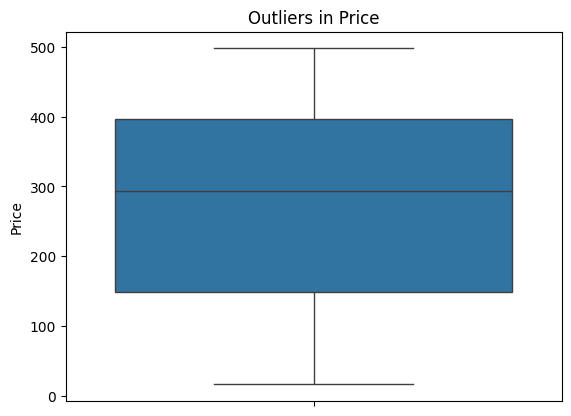

In [25]:
sns.boxplot(data['Price'])
plt.title('Outliers in Price')
plt.show()

In [26]:
df = pd.read_csv('/content/Transactions.csv')

In [27]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

In [28]:
actual_columns = df.columns.tolist()
print(actual_columns)

['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']


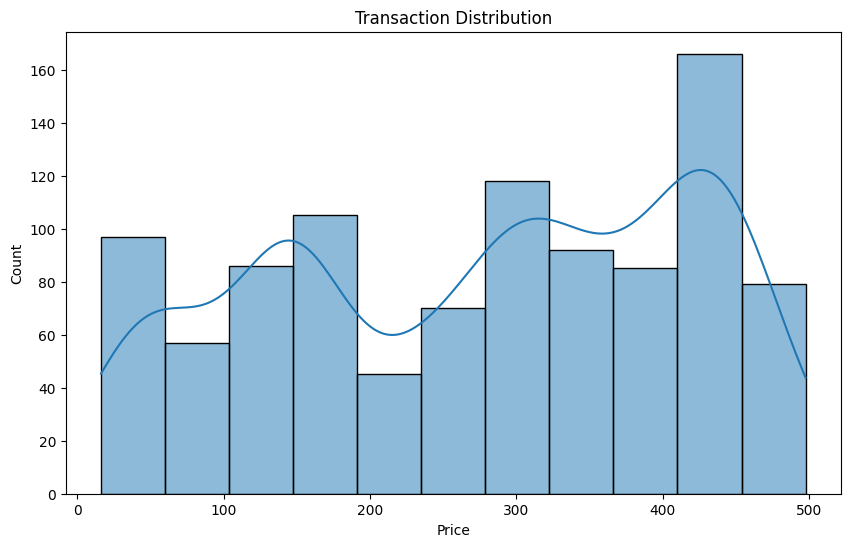

In [29]:
plt.figure(figsize=(10, 6))
if 'transaction_amount' in df.columns:
    sns.histplot(df['transaction_amount'], kde=True)
elif 'Price' in df.columns:
    sns.histplot(df['Price'], kde=True)
elif 'price' in df.columns:
    sns.histplot(df['price'], kde=True)
else:
    print("Column 'transaction_amount', 'Price', or 'price' not found in the DataFrame.")
plt.title('Transaction Distribution')
plt.show()